<a href="https://colab.research.google.com/github/abyanrifqy/ProjectSingkat/blob/master/Model%20ML/ML%20Poverty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Determining Poverty

## The Dataset

The dataset that we'll be using is the [Costa Rican Household Poverty Level Prediction dataset](https://www.kaggle.com/c/costa-rican-household-poverty-prediction/data?select=sample_submission.csv) hosted on Kaggle. The dataset contains several indicators that will predict which households have the highest need for social welfare assistance. 

The original dataset contains 141 different attributes and four household poverty classifications. But we only take several attributes for predictions and all categorical classification. This dataset has train data also test data without 'Target'.

The feature columns are below:

Feature | Description
--------|--------------
rooms	|number of all rooms in the house			
v14a	|<br> 0 = doesn't have toilet in household <br> 1 = has toilet in the household			
refrig	| <br> 0 = doesn't have refrigerator in household <br> 1 = has refrigerator in the household	
television	| <br> 0 = doesn't have television in household <br> 1 = has television in the household	
computer	| <br> 0 = doesn't have computer/notebook in household <br> 1 = has computer/notebook in the household			
escolari |	years of schooling			
dis	| <br> 0 = doesn't have disable person in household <br> 1 = has disable person in the household			
estadocivil3	| 1 = if married 			
estadocivil4 | 1 = if divorced 
hogar_nin	| Number of children age 0 to 19 in household			
hogar_mayor	|number of individuals age 65+ in the household	
hogar_total	| number of total individuals in the household	
tipovivi3	| 1 = rented house	
v2a1	| 1 = Monthly rent payment
dependency	| Dependency rate	
SQBdependency	| dependency squared			
r4t1 |	persons younger than 12 years of age

Self-added feature

Feature | Description
--------|--------------
bedroom | <br> 0 = poor <br> 1 = rich	
kitchen | <br> 0 = poor <br> 1 = rich	
living_room | <br> 0 = poor <br> 1 = rich			

The target is an ordinal variable indicating groups of income levels.
* 1 = extreme poverty
* 2 = moderate poverty
* 3 = vulnerable households
* 4 = non vulnerable households

We assume to take category 1 & 2 for straightly receive social aid. Category 3 is in consideration whether suitable or not. Category 4 is rejected. 

### Exploratory Data Analysis

Let's download the data and take a look at what we are working with.

Upload your `kaggle.json` file and run the code below.

In [ ]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'

chmod: cannot access 'kaggle.json': No such file or directory


And then download the dataset.

In [ ]:
!kaggle competitions download -c costa-rican-household-poverty-prediction
!ls

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
drive  sample_data


Since we already downloaded it and store to Google Drive, we will mount Google Drive into Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


And load the data into a `DataFrame` and take a peek.

In [ ]:
import pandas as pd

path = '/content/drive/Shareddrives/Capstone Project/ML Poverty/costa-rican-household-poverty-prediction/train.csv'
csv = pd.read_csv(path)

columns = ['rooms', 'v14a', 'refrig','television','computer', 'hogar_nin', 'escolari','dis','estadocivil3','estadocivil4','hogar_mayor',
            'hogar_total','tipovivi3','v2a1','dependency','SQBdependency','r4t1','Target']

df_old =  pd.DataFrame(csv, columns=columns)
df_old

,rooms,v14a,refrig,television,computer,hogar_nin,escolari,dis,estadocivil3,estadocivil4,hogar_mayor,hogar_total,tipovivi3,v2a1,dependency,SQBdependency,r4t1,Target
0,3,1,1,0,0,0,10,0,0,1,0,1,1,190000.0,no,0.0000,0,4
1,4,1,1,0,0,0,12,0,0,1,1,1,1,135000.0,8,64.0000,0,4
2,8,1,1,0,0,0,11,1,0,0,1,1,0,NaN,8,64.0000,0,4
3,5,1,1,0,0,2,9,0,0,0,0,4,1,180000.0,yes,1.0000,1,4
4,5,1,1,0,0,2,11,0,0,0,0,4,1,180000.0,yes,1.0000,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,6,1,1,1,0,1,9,0,0,0,0,5,1,80000.0,.25,0.0625,1,2
9553,6,1,1,1,0,1,0,0,0,0,0,5,1,80000.0,.25,0.0625,1,2
9554,6,1,1,1,0,1,5,0,0,0,0,5,1,80000.0,.25,0.0625,1,2
9555,6,1,1,1,0,1,11,0,0,0,0,5,1,80000.0,.25,0.0625,1,2


#### Preprocessing Data

Check if there is NaN value.

In [ ]:
df_old.isna()

,rooms,v14a,refrig,television,computer,hogar_nin,escolari,dis,estadocivil3,estadocivil4,hogar_mayor,hogar_total,tipovivi3,v2a1,dependency,SQBdependency,r4t1,Target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9553,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9554,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9555,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


We've seen several trues from data above. Let's fill NaN with 0.

In [ ]:
df_old = df_old.fillna(0)
df_old

,rooms,v14a,refrig,television,computer,hogar_nin,escolari,dis,estadocivil3,estadocivil4,hogar_mayor,hogar_total,tipovivi3,v2a1,dependency,SQBdependency,r4t1,Target
0,3,1,1,0,0,0,10,0,0,1,0,1,1,190000.0,no,0.0000,0,4
1,4,1,1,0,0,0,12,0,0,1,1,1,1,135000.0,8,64.0000,0,4
2,8,1,1,0,0,0,11,1,0,0,1,1,0,0.0,8,64.0000,0,4
3,5,1,1,0,0,2,9,0,0,0,0,4,1,180000.0,yes,1.0000,1,4
4,5,1,1,0,0,2,11,0,0,0,0,4,1,180000.0,yes,1.0000,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,6,1,1,1,0,1,9,0,0,0,0,5,1,80000.0,.25,0.0625,1,2
9553,6,1,1,1,0,1,0,0,0,0,0,5,1,80000.0,.25,0.0625,1,2
9554,6,1,1,1,0,1,5,0,0,0,0,5,1,80000.0,.25,0.0625,1,2
9555,6,1,1,1,0,1,11,0,0,0,0,5,1,80000.0,.25,0.0625,1,2


Check types of columns to identify if we need to convert string data into binary.

In [ ]:
df_old.dtypes

rooms              int64
v14a               int64
refrig             int64
television         int64
computer           int64
hogar_nin          int64
escolari           int64
dis                int64
estadocivil3       int64
estadocivil4       int64
hogar_mayor        int64
hogar_total        int64
tipovivi3          int64
v2a1             float64
dependency        object
SQBdependency    float64
r4t1               int64
Target             int64
dtype: object

Dependency column need to be converted into number. If string is "yes" then the output will 1. If string is "no" then the output will 0.

In [ ]:
df_old["dependency"].replace({"yes": float(1)}, inplace=True)
df_old["dependency"].replace({"no": float(0)}, inplace=True)
df_old.dtypes

rooms              int64
v14a               int64
refrig             int64
television         int64
computer           int64
hogar_nin          int64
escolari           int64
dis                int64
estadocivil3       int64
estadocivil4       int64
hogar_mayor        int64
hogar_total        int64
tipovivi3          int64
v2a1             float64
dependency        object
SQBdependency    float64
r4t1               int64
Target             int64
dtype: object

Dependency still in string format, so we need convert it to float.

In [ ]:
df_old['dependency'] = df_old['dependency'].astype(float, errors = 'raise')
print(df_old.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rooms          9557 non-null   int64  
 1   v14a           9557 non-null   int64  
 2   refrig         9557 non-null   int64  
 3   television     9557 non-null   int64  
 4   computer       9557 non-null   int64  
 5   hogar_nin      9557 non-null   int64  
 6   escolari       9557 non-null   int64  
 7   dis            9557 non-null   int64  
 8   estadocivil3   9557 non-null   int64  
 9   estadocivil4   9557 non-null   int64  
 10  hogar_mayor    9557 non-null   int64  
 11  hogar_total    9557 non-null   int64  
 12  tipovivi3      9557 non-null   int64  
 13  v2a1           9557 non-null   float64
 14  dependency     9557 non-null   float64
 15  SQBdependency  9557 non-null   float64
 16  r4t1           9557 non-null   int64  
 17  Target         9557 non-null   int64  
dtypes: float

In [ ]:
len(df_old['Target'])

9557

Because we don't have yet room classification data, we'll create it now

In [ ]:
import numpy as np

bedroom = []
kitchen =[]
livingroom =[]
# random = np.random.randint(2)
for i, value in enumerate(df_old['Target']):
  if value == 4:
    bedroom.append(int(1))
    kitchen.append(np.random.randint(2))
    livingroom.append(int(1))
  elif value == 3:
    bedroom.append(int(1))
    kitchen.append(np.random.randint(2))
    livingroom.append(np.random.randint(2))
  else:
    bedroom.append(int(0))
    kitchen.append(int(0))
    livingroom.append(int(0))

room =  pd.DataFrame({'bedroom': bedroom,
                   'kitchen': kitchen,
                   'living_room': livingroom})
room.to_csv('new_room.csv', columns=['bedroom','kitchen','living_room'])

Save csv file to drive and change the name into new_room.csv

In [ ]:
path_room = '/content/drive/Shareddrives/Capstone Project/ML Poverty/costa-rican-household-poverty-prediction/new_room.csv'

f_room =  pd.read_csv(path_room)
c_room = ['bedroom','kitchen','living_room']
df_room =  pd.DataFrame(f_room, columns=c_room)
df_room

,bedroom,kitchen,living_room
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,1
4,1,0,1
...,...,...,...
9552,0,0,0
9553,0,0,0
9554,0,0,0
9555,0,0,0


We concatenate room.csv file with df before.

In [ ]:
df = pd.concat([df_old, df_room], axis=1)
df

,rooms,v14a,refrig,television,computer,hogar_nin,escolari,dis,estadocivil3,estadocivil4,hogar_mayor,hogar_total,tipovivi3,v2a1,dependency,SQBdependency,r4t1,Target,bedroom,kitchen,living_room
0,3,1,1,0,0,0,10,0,0,1,0,1,1,190000.0,0.00,0.0000,0,4,1,1,1
1,4,1,1,0,0,0,12,0,0,1,1,1,1,135000.0,8.00,64.0000,0,4,1,1,1
2,8,1,1,0,0,0,11,1,0,0,1,1,0,0.0,8.00,64.0000,0,4,1,0,1
3,5,1,1,0,0,2,9,0,0,0,0,4,1,180000.0,1.00,1.0000,1,4,1,0,1
4,5,1,1,0,0,2,11,0,0,0,0,4,1,180000.0,1.00,1.0000,1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,6,1,1,1,0,1,9,0,0,0,0,5,1,80000.0,0.25,0.0625,1,2,0,0,0
9553,6,1,1,1,0,1,0,0,0,0,0,5,1,80000.0,0.25,0.0625,1,2,0,0,0
9554,6,1,1,1,0,1,5,0,0,0,0,5,1,80000.0,0.25,0.0625,1,2,0,0,0
9555,6,1,1,1,0,1,11,0,0,0,0,5,1,80000.0,0.25,0.0625,1,2,0,0,0


Then, target is in integer format. We convert it to string format for easier one-hot-encoding later.

In [ ]:
for i in df['Target']:
  if i == 1:
    df['Target'].replace({1: 'extreme-poor'}, inplace=True)
  elif i == 2:
    df['Target'].replace({2: 'moderate-poor'}, inplace=True)
  elif i == 3:
    df['Target'].replace({3: 'vulnarable'}, inplace=True)
  elif i == 4:
    df['Target'].replace({4: 'non-vulnarable'}, inplace=True)


df

,rooms,v14a,refrig,television,computer,hogar_nin,escolari,dis,estadocivil3,estadocivil4,hogar_mayor,hogar_total,tipovivi3,v2a1,dependency,SQBdependency,r4t1,Target,bedroom,kitchen,living_room
0,3,1,1,0,0,0,10,0,0,1,0,1,1,190000.0,0.00,0.0000,0,non-vulnarable,1,1,1
1,4,1,1,0,0,0,12,0,0,1,1,1,1,135000.0,8.00,64.0000,0,non-vulnarable,1,1,1
2,8,1,1,0,0,0,11,1,0,0,1,1,0,0.0,8.00,64.0000,0,non-vulnarable,1,0,1
3,5,1,1,0,0,2,9,0,0,0,0,4,1,180000.0,1.00,1.0000,1,non-vulnarable,1,0,1
4,5,1,1,0,0,2,11,0,0,0,0,4,1,180000.0,1.00,1.0000,1,non-vulnarable,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,6,1,1,1,0,1,9,0,0,0,0,5,1,80000.0,0.25,0.0625,1,moderate-poor,0,0,0
9553,6,1,1,1,0,1,0,0,0,0,0,5,1,80000.0,0.25,0.0625,1,moderate-poor,0,0,0
9554,6,1,1,1,0,1,5,0,0,0,0,5,1,80000.0,0.25,0.0625,1,moderate-poor,0,0,0
9555,6,1,1,1,0,1,11,0,0,0,0,5,1,80000.0,0.25,0.0625,1,moderate-poor,0,0,0


Move the target into last column.

In [ ]:
cols = list(df.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('Target')) # Remove Target from list
df = df[cols+['Target']]
df

,rooms,v14a,refrig,television,computer,hogar_nin,escolari,dis,estadocivil3,estadocivil4,hogar_mayor,hogar_total,tipovivi3,v2a1,dependency,SQBdependency,r4t1,bedroom,kitchen,living_room,Target
0,3,1,1,0,0,0,10,0,0,1,0,1,1,190000.0,0.00,0.0000,0,1,1,1,non-vulnarable
1,4,1,1,0,0,0,12,0,0,1,1,1,1,135000.0,8.00,64.0000,0,1,1,1,non-vulnarable
2,8,1,1,0,0,0,11,1,0,0,1,1,0,0.0,8.00,64.0000,0,1,0,1,non-vulnarable
3,5,1,1,0,0,2,9,0,0,0,0,4,1,180000.0,1.00,1.0000,1,1,0,1,non-vulnarable
4,5,1,1,0,0,2,11,0,0,0,0,4,1,180000.0,1.00,1.0000,1,1,0,1,non-vulnarable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,6,1,1,1,0,1,9,0,0,0,0,5,1,80000.0,0.25,0.0625,1,0,0,0,moderate-poor
9553,6,1,1,1,0,1,0,0,0,0,0,5,1,80000.0,0.25,0.0625,1,0,0,0,moderate-poor
9554,6,1,1,1,0,1,5,0,0,0,0,5,1,80000.0,0.25,0.0625,1,0,0,0,moderate-poor
9555,6,1,1,1,0,1,11,0,0,0,0,5,1,80000.0,0.25,0.0625,1,0,0,0,moderate-poor


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rooms          9557 non-null   int64  
 1   v14a           9557 non-null   int64  
 2   refrig         9557 non-null   int64  
 3   television     9557 non-null   int64  
 4   computer       9557 non-null   int64  
 5   hogar_nin      9557 non-null   int64  
 6   escolari       9557 non-null   int64  
 7   dis            9557 non-null   int64  
 8   estadocivil3   9557 non-null   int64  
 9   estadocivil4   9557 non-null   int64  
 10  hogar_mayor    9557 non-null   int64  
 11  hogar_total    9557 non-null   int64  
 12  tipovivi3      9557 non-null   int64  
 13  v2a1           9557 non-null   float64
 14  dependency     9557 non-null   float64
 15  SQBdependency  9557 non-null   float64
 16  r4t1           9557 non-null   int64  
 17  bedroom        9557 non-null   int64  
 18  kitchen 

We can see that all of the features are numeric, but varies a bit in scale. Only target in string format

Let's describe the data:

In [ ]:
df.describe()

,rooms,v14a,refrig,television,computer,hogar_nin,escolari,dis,estadocivil3,estadocivil4,hogar_mayor,hogar_total,tipovivi3,v2a1,dependency,SQBdependency,r4t1,bedroom,kitchen,living_room
count,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9.557000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000
mean,4.955530,0.994768,0.957623,0.284608,0.102124,1.406613,7.200272,0.057549,0.268390,0.031914,0.284085,3.999058,0.181647,4.662861e+04,1.149550,3.900409,0.785079,0.753898,0.374281,0.689128
std,1.468381,0.072145,0.201459,0.451251,0.302827,1.366185,4.730877,0.232902,0.443145,0.175780,0.597163,1.772216,0.385573,1.091671e+05,1.605993,12.511831,1.047559,0.430761,0.483962,0.462875
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000e+00,0.333333,0.111111,0.000000,1.000000,0.000000,0.000000
50%,5.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000e+00,0.666667,0.444444,0.000000,1.000000,0.000000,1.000000
75%,6.000000,1.000000,1.000000,1.000000,0.000000,2.000000,11.000000,0.000000,1.000000,0.000000,0.000000,5.000000,0.000000,4.500000e+04,1.333333,1.777778,1.000000,1.000000,1.000000,1.000000
max,11.000000,1.000000,1.000000,1.000000,1.000000,9.000000,21.000000,1.000000,1.000000,1.000000,3.000000,13.000000,1.000000,2.353477e+06,8.000000,64.000000,7.000000,1.000000,1.000000,1.000000


#### Plot Data

We want to see either there is correlation between each feature and target. 

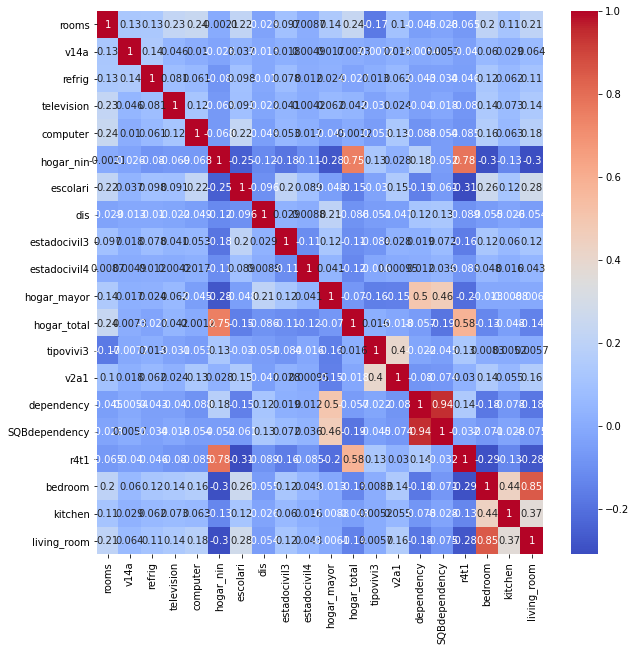

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
_ = sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

Not many strong correlation between each features. Strong correlation appears on related person-total in household feature (begin with hogar). 

We're curious how if we plot several columns into histogram.

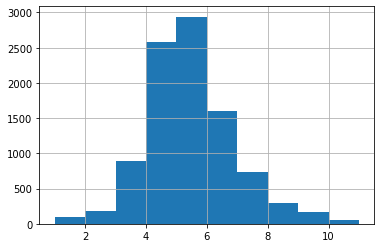

In [ ]:
# room histogram
df['rooms'].hist()

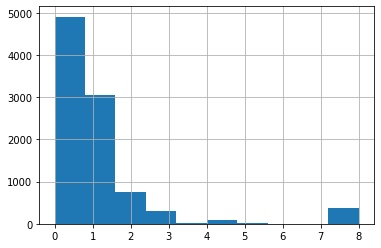

In [ ]:
# dependency rate histogram
df['dependency'].hist()

## The Model

Let's build and train our model. We'll build a deep neural network that takes our input features and returns 4 category of poverty.

First, let's create a list of features to make coding easier.

In [ ]:
FEATURES = df.columns.values[:-1]
TARGET = df.columns.values[-1]

FEATURES, TARGET

(array(['rooms', 'v14a', 'refrig', 'television', 'computer', 'hogar_nin',
        'escolari', 'dis', 'estadocivil3', 'estadocivil4', 'hogar_mayor',
        'hogar_total', 'tipovivi3', 'v2a1', 'dependency', 'SQBdependency',
        'r4t1', 'bedroom', 'kitchen', 'living_room'], dtype=object), 'Target')

We'll also want to normalize our feature data before feeding it into the model.

In [ ]:
df.loc[:, FEATURES] = ((df[FEATURES] - df[FEATURES].min()) / (df[FEATURES].max() - df[FEATURES].min()))

df.describe()

,rooms,v14a,refrig,television,computer,hogar_nin,escolari,dis,estadocivil3,estadocivil4,hogar_mayor,hogar_total,tipovivi3,v2a1,dependency,SQBdependency,r4t1,bedroom,kitchen,living_room
count,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000
mean,0.395553,0.994768,0.957623,0.284608,0.102124,0.156290,0.342870,0.057549,0.268390,0.031914,0.094695,0.249922,0.181647,0.019813,0.143694,0.060944,0.112154,0.753898,0.374281,0.689128
std,0.146838,0.072145,0.201459,0.451251,0.302827,0.151798,0.225280,0.232902,0.443145,0.175780,0.199054,0.147685,0.385573,0.046385,0.200749,0.195497,0.149651,0.430761,0.483962,0.462875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.300000,1.000000,1.000000,0.000000,0.000000,0.000000,0.190476,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.041667,0.001736,0.000000,1.000000,0.000000,0.000000
50%,0.400000,1.000000,1.000000,0.000000,0.000000,0.111111,0.285714,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.083333,0.006944,0.000000,1.000000,0.000000,1.000000
75%,0.500000,1.000000,1.000000,1.000000,0.000000,0.222222,0.523810,0.000000,1.000000,0.000000,0.000000,0.333333,0.000000,0.019121,0.166667,0.027778,0.142857,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Convert to One-Hot-Encoding

Now, we will convert Target in train data into binary number through one hot encoding method.

In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [ ]:
import numpy as np 
from sklearn.model_selection import train_test_split

X_train, y_train =  df[FEATURES], df[TARGET]
X_train = np.array(X_train)
X_train.shape

(9557, 20)

In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
# convert integers to one hot encoded
y_train = np_utils.to_categorical(y_train)

In [ ]:
y_train[600:610]

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

We know then 
* Category 1 = [1., 0., 0., 0.]
* Category 2 = [0., 1., 0., 0.]
* Category 3 = [0., 0., 0., 1.]
* Category 4 = [0., 0., 1., 0.]

Category 3 and 4 are reversed because alphabetical order between "vulnarable" and "non-vulnarable".

### Create Model and Train

We'll use the TensorFlow Keras [`Sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) model. The input size needs to be equal to the number of input features that we have. The output size needs to be 4 since we have 4 categories. The number and width of layers in between are an area for experimentation, as are the activation functions.

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD, Adagrad
from keras.models import Sequential
from keras.layers import Dense, Dropout

input_dim = len(df.columns) - 1

model = Sequential()
model.add(Dense(512, input_dim = input_dim , activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation = 'softmax'))

opt = Adam(learning_rate=1e-3)
model.compile(loss = 'categorical_crossentropy' , optimizer = opt , metrics = ['accuracy'] )

callback = tf.keras.callbacks.EarlyStopping (monitor='val_loss', min_delta=1e-3, patience=10, verbose=1,
)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               10752     
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 260       
Total params: 158,788
Trainable params: 158,788
Non-trainable params: 0
________________________________________________

And finally, we can actually fit the model. We'll start with a run of 500 training epochs. Once we are done, we'll print out the training and validation accuracy the model achieved.

In [ ]:
history = model.fit(X_train, y_train, 
                    epochs = 500, 
                    batch_size = 64, 
                    validation_split=0.2, 
                    steps_per_epoch=5,
                    validation_batch_size=16,
                    callbacks = [callback]
                    )

history.history['accuracy'][-1]

Epoch 1/500
5/5 [==============================] - 1s 127ms/step - loss: 1.2261 - accuracy: 0.5042 - val_loss: 1.0492 - val_accuracy: 0.5005
Epoch 2/500
5/5 [==============================] - 0s 50ms/step - loss: 0.9113 - accuracy: 0.6088 - val_loss: 0.8668 - val_accuracy: 0.7160
Epoch 3/500
5/5 [==============================] - 0s 88ms/step - loss: 0.6562 - accuracy: 0.8105 - val_loss: 0.7350 - val_accuracy: 0.7406
Epoch 4/500
5/5 [==============================] - 0s 87ms/step - loss: 0.6832 - accuracy: 0.7437 - val_loss: 0.6116 - val_accuracy: 0.7824
Epoch 5/500
5/5 [==============================] - 0s 86ms/step - loss: 0.4816 - accuracy: 0.8512 - val_loss: 0.5474 - val_accuracy: 0.8154
Epoch 6/500
5/5 [==============================] - 0s 41ms/step - loss: 0.4118 - accuracy: 0.8570 - val_loss: 0.5798 - val_accuracy: 0.7850
Epoch 7/500
5/5 [==============================] - 0s 85ms/step - loss: 0.3874 - accuracy: 0.8372 - val_loss: 0.4925 - val_accuracy: 0.8180
Epoch 8/500
5/5 [==

0.871874988079071

Let's see how the accuracy improves and the loss is reduced over epochs.

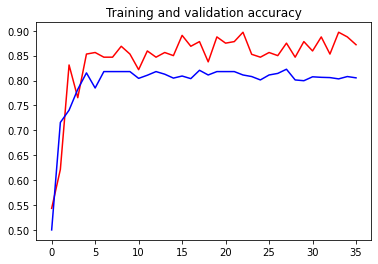

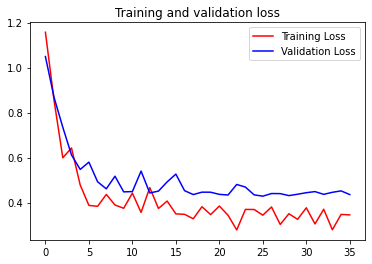

In [ ]:
# Plot loss and accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We don't train it longer since it will too overfitting. 

## Evaluate Model

We split again train and validation data using sklearn for model.evaluate. Previously, it was splitted in model.fit for model training

In [ ]:
X_train, X_validate, y_train, y_validate = train_test_split(
    df[FEATURES], df[TARGET], test_size=0.2)
X_train = np.array(X_train)
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
y_validate = encoder.transform(y_validate)
# convert integers to one hot encoded
y_validate = np_utils.to_categorical(y_validate)

In [ ]:
# Evaluate the model on the validation data using `evaluate`
print("Evaluate on validation data")
results = model.evaluate(X_validate, y_validate, batch_size=32)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(X_validate[:3])
print("predictions:", predictions)

Evaluate on validation data
60/60 [==============================] - 0s 2ms/step - loss: 0.3531 - accuracy: 0.8588
test loss, test acc: [0.3531401753425598, 0.8587865829467773]
Generate predictions for 3 samples
predictions: [[2.66213785e-04 1.12339425e-04 9.38405573e-01 6.12159334e-02]
 [3.91873002e-01 6.04248405e-01 1.46713376e-03 2.41142279e-03]
 [7.47663958e-04 3.73640942e-04 8.97685528e-01 1.01193234e-01]]


## Convert to tensorflow and tf.lite format

In [ ]:
model_name = 'Poverty_classification'
model.save(model_name)
# model.save(model_name, save_format='h5') # for tf.lite

INFO:tensorflow:Assets written to: Poverty_classification/assets


INFO:tensorflow:Assets written to: Poverty_classification/assets


In [ ]:
#Convert to tf lite

# Load the model.
filepath = '/content/Poverty_classification.h5'
new_model= tf.keras.models.load_model(filepath=filepath)

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('Poverty_ML.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpota37lx_/assets
